<div class="alert alert-success">
<h2> Комментарий ревьюера v3 ✔️ <a class="tocSkip"> </h2>

Спасибо тебе, за классный проект! Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

<div style="border:solid purple 2px; padding: 20px"> 

Привет Артур! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Сейчас сложилась такая ситуация, что очень схожий проект я уже проверял. Передал информацию куратору. Просьба связаться с ним
    
    
    
    
    !!! Куратор кто? Это мой проект. К кому мне обратиться?

<div style="border:solid purple 2px; padding: 20px">
    
Куратор твоей когорты Свинцова Любовь, обратись к ней
    
Мы с ней обсудили мои замечания, готов исправиться.
    
Поправил, все ответы нашёл в теории, у меня получилось. Спасибо большое!

<div style="border:solid purple 2px; padding: 20px"> 

Давай смотреть) Теперь по оформлению...

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

---
    
К сожалению, основные ошибки с первоисточника не были исправлены. Я добавил комментария на их исправления, но просьба в дальнейшем пробовать реализовать все самому, ведь только так мы сможем набить руку и стать профессионалом) Буду ждать работу на повторное ревью

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import time
from tqdm import tqdm

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


 Описание данных:
 1. RowNumber — индекс строки в данных
 2. CustomerId — уникальный идентификатор клиента
 3. Surname — фамилия
 4. CreditScore — кредитный рейтинг
 5. Geography — страна проживания
 6. Gender — пол
 7. Age — возраст
 8. Tenure — сколько лет человек является клиентом банка
 9. Balance — баланс на счёте
 10. NumOfProducts — количество продуктов банка, используемых клиентом
 11. HasCrCard — наличие кредитной карты
 12. IsActiveMember — активность клиента
 13. EstimatedSalary — предполагаемая зарплата
 14. Exited — факт ухода клиента

In [3]:
#df = df.dropna()
#df.isna().sum()
# df['Tenure'].astype(object)
# df['Tenure'] = df['Tenure'].fillna(value=-1)
# df_ohe = pd.get_dummies(df, drop_first=True)
# target = df_ohe['Tenure']
# features = df_ohe.drop('Tenure', axis=1)

# код ревьюера
df['Tenure'] = df['Tenure'].fillna(value=-1)
df['Tenure'] = df['Tenure'].astype(object)

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Все же удалить 9% данных, это очень много, теряем довольно большую часть данных. Как можно было поступить:
    
- распределение по `Tenure` ровномерное, если сейчас заменить почти 900 пропусков (9% данных) средним или медианой, то мы значительно исказим распределение. В таком случае можно заполнить пропуски случайными значениями в интервале от минимального до максимального значения по данному столбцу.

- Так как значений в этом признаке ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменить тип данных `Tenure` на `object` и применить технику [OHE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
    
- Можно попробовать определить данный параметр с помощью ML, т.е попробовать спрогнозировать его на основании других парметров

<div class="alert alert-danger">
<h2> Комментарий ревьюера v2 ❌ <a class="tocSkip"> </h2>

Да, но удалять - решение тоже не обоснованное. Я привел еще два варианта, может попробовать их?

<div class="alert alert-warning">
<h2> Комментарий ревьюера v3 ⚠️ <a class="tocSkip"> </h2>

ТОлько порядок не тот, сначала нам нужно заполнить пропуски, а потом менять тип данных. При этом ты забыл прописать `df['Tenure'] = ...`, поэтому тип данных не поменялся. Я исправил, но будь внимательнее. Проверяй, что ты сделал

<div style="border:solid purple 2px; padding: 20px">
<h2> Комментарий студента v2  <a class="tocSkip"> </h2>
    
Зманил пропуски на -1, переделал тип на object и применил OHE.

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
# Удалим столбцы, которые не будут участвовать.
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

Закодируем датасет, чтобы столбцы с категориальными признаками, стали численными и потом разделим датасет на три выборки обучающая - 60%, валидационная - 20% и тестовая - 20%.

In [6]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

<div style="border:solid purple 2px; padding: 20px">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Порядок изменил, сначала удалил  столбцы, следом - категоризация.

## Исследование задачи

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Классы разные, соотношение далеко не 1:1.Примерное распределение это 80 и 20%.

Построим модели случайного леса и решающего дерева на основе несбалансированных данных и выстроим гиперпараметры. Оценим значения метрики F1 и auc roc score.

In [8]:
%%time
# случайный лес
best_model = None
best_result = 0
for est in range(5, 150, 5):
    for depth in range(3, 20):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est
                                       , random_state=1234).fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_result:
            best_model = model # сохраните наилучшую модель
            best_result = f1 #  сохраните наилучшее значение метрики accuracy на валидационных данных

print('max_depth:', depth,'F1:', f1)

max_depth: 19 F1: 0.5792079207920792
CPU times: user 3min 17s, sys: 930 ms, total: 3min 18s
Wall time: 3min 18s


<div style="border:solid purple 2px; padding: 20px">
<h2> Комментарий студента  <a class="tocSkip"> </h2>
    
max_depth: 19 F1: 0.5927710843373494 - лучшее значение!

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

А почему max_depth именно такой? Может его тоже стоит подобрать, в таком случае можно использовать вложенные циклы
    
    for est in range(5, 150, 5):
        for depth in range(3, 20):

<div class="alert alert-danger">
<h2> Комментарий ревьюера v2 ❌ <a class="tocSkip"> </h2>

Да, но при этом не факт, что другая комбинация параметров не будет лучше. Подбирай их вместе, используй вложенные циклы как я показал выше

<div style="border:solid purple 2px; padding: 20px">
<h2> Комментарий студента V2 <a class="tocSkip"> </h2>
    
Да, супер, у меня получилось!

In [9]:
from sklearn.metrics import roc_auc_score
probabilities_valid1 = model.predict_proba(features_valid)
probabilities_one_valid1 = probabilities_valid1[:, 1]
auc_roc1 = roc_auc_score(target_valid, probabilities_one_valid1)
print(auc_roc1)

0.8607544465889259


F1 оптималтно при n_estimators=100 и глубине дерева 10.

In [10]:
%%time

# решающее дерево
for depth in range(2, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_2 = f1_score(target_valid, predicted_valid)
    print("n_depth =", depth, ":", f1_2)

n_depth = 2 : 0.5431034482758621
n_depth = 3 : 0.4552845528455285
n_depth = 4 : 0.4893617021276596
n_depth = 5 : 0.5714285714285715
n_depth = 6 : 0.5435897435897437
n_depth = 7 : 0.5418719211822659
n_depth = 8 : 0.515970515970516
n_depth = 9 : 0.5379310344827586
n_depth = 10 : 0.5434782608695652
n_depth = 11 : 0.5496828752642706
n_depth = 12 : 0.5093167701863355
n_depth = 13 : 0.5060728744939271
n_depth = 14 : 0.5107212475633529
CPU times: user 345 ms, sys: 8 ms, total: 353 ms
Wall time: 359 ms


<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Индикаторы состояния: progress и tqdm <a class="tocSkip"> </h3>

Как перестать беспокоиться о том, не завис ли скрипт? Вы можете создавать свои индикаторы состояния. Это весьма увлекательное занятие. Но делать то же самое с [progress](https://pypi.org/project/progress/) (ее обычно используют для работы из консоли) или [tqdm](https://pypi.org/project/tqdm/) (отлично подойдет для тетрадок) куда быстрее и надежнее.

Обычно я использую эти две библиотеки, но вот [здесь](https://habr.com/ru/post/483400/) ты можешь почитать про альтернативные варианты

![](https://i.ibb.co/B4SDm8Y/68747470733a2f2f7261772e6769746875622e636f6d2f7665726967616b2f70726f67726573732f6d61737465722f64656d.gif)

In [11]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.693038011256602


Dыберем модель случайного леса, так как метрики F1 и roc_auc_score имеют наибольшие значения

## Борьба с дисбалансом

Примеим атрибут class_weight.

In [12]:
model_LogReg = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_LogReg.fit(features_train, target_train)
predicted_LogReg = model_LogReg.predict(features_valid)
print(metrics.classification_report(target_valid, predicted_LogReg))
print()

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       987
           1       0.38      0.72      0.49       263

    accuracy                           0.69      1250
   macro avg       0.64      0.70      0.64      1250
weighted avg       0.79      0.69      0.72      1250




In [13]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.44714459295261244


In [14]:
print(features_upsampled.shape, target_upsampled.shape)

(12006, 21) (12006,)


In [15]:
print(metrics.confusion_matrix(target_valid, predicted_valid))

[[611 376]
 [ 79 184]]


In [16]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4326530612244899


In [17]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_DTC.fit(features_downsampled, target_downsampled)
predicted_DTC = model_DTC.predict(features_valid)
print(metrics.classification_report(target_valid, predicted_DTC))
print()

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       987
           1       0.42      0.83      0.56       263

    accuracy                           0.72      1250
   macro avg       0.68      0.76      0.68      1250
weighted avg       0.83      0.72      0.75      1250




In [18]:
print(metrics.confusion_matrix(target_valid, predicted_DTC))

[[686 301]
 [ 44 219]]


Всё еще наблюдается дисбаланс классов.

In [19]:
%%time
best_model = None
best_result = 0

#for depth in range(2, 22, 2):
#    for est in range(50, 351, 50):
for depth in range(3, 20):
    for est in range(5, 150, 5):
        model_RFC = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=22, class_weight='balanced')
        model_RFC.fit(features_downsampled,target_downsampled) 
        result = model_RFC.score(features_valid,target_valid)
        if result > best_result:
            best_model = model_RFC
            best_result = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.7928
CPU times: user 1min 42s, sys: 388 ms, total: 1min 42s
Wall time: 1min 43s


In [20]:
predicted_RFC = best_model.predict(features_valid)
print(metrics.classification_report(target_valid, predicted_RFC))
print()
print(metrics.confusion_matrix(target_valid, predicted_RFC))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       987
           1       0.50      0.78      0.61       263

    accuracy                           0.79      1250
   macro avg       0.72      0.79      0.74      1250
weighted avg       0.84      0.79      0.81      1250


[[785 202]
 [ 57 206]]


У случайного леса самые лучшие результаты, буду проверять на тестовой выборкке.

## Тестирование модели

In [21]:
probabilities_valid = model_RFC.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Auc_roc', auc_roc)

Auc_roc 0.8600822094066977


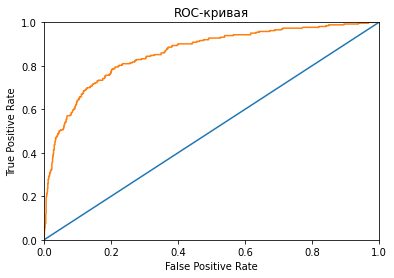

In [22]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='-')

#plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

<div class="alert alert-danger">
<h2> Комментарий ревьюера v2 ❌ <a class="tocSkip"> </h2>

Кривую для рандомной модели (прямая) хорошо бы поместить с нашей моделью на одном графике

<div style="border:solid purple 2px; padding: 20px">
<h2> Комментарий студента V2 <a class="tocSkip"> </h2>
    
Как-то вот так!

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 ✔️ <a class="tocSkip"> </h2>

Да, то что нужно

In [23]:
predicted_RFC_test = best_model.predict(features_test)
print(metrics.classification_report(target_test, predicted_RFC_test))
print()
print(metrics.confusion_matrix(target_test, predicted_RFC_test))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       978
           1       0.49      0.76      0.59       272

    accuracy                           0.77      1250
   macro avg       0.70      0.77      0.72      1250
weighted avg       0.83      0.77      0.79      1250


[[760 218]
 [ 65 207]]


In [24]:
best_model

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=15,
                       random_state=22)

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

По условию задачи, на тестовой выборке F1 должен быть не меньше 0.59, без выполнения данного условия, к сожалению, мы дальше пойти не можем

<div class="alert alert-danger">
<h2> Комментарий ревьюера v2 ❌ <a class="tocSkip"> </h2>

К сожалению, условие задачи здесь пока не выполняется. Попробуй подобрать параметры как в ячейке 21 для увеличенной выборки, результат должен быть лучше

<div style="border:solid purple 2px; padding: 20px">
<h2> Комментарий студента V2 <a class="tocSkip"> </h2>
    
Если я вас правильно понял, на валидационной выборке поправил параметры EST и  DEPTH. Если что, прошу меня поправить! Попрпвил ячейку номер 19!

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 ✔️ <a class="tocSkip"> </h2>

Отлично! По метрике прошли

<div class="alert alert-success">
<h2> Комментарий студента ✔️ <a class="tocSkip"> </h2>
    
ОБЩИЙ ВЫВОД:
    
AUC-ROC высокое - это говорит о хорошем качестве модели. ROC-CURVE говорит о большем значении TRP. На тестовой выборке у нас F1 больше 0,59. В результате работы создали модель машинного обучения, которая дает достаточный уровень F1. Для этого в первичном датасете были найдены пропуски и обработаны. Были удалены столбцы, не участвующие в работе модели. Затем данные были закодированы для того, чтобы столбцы с категориальными данными стали числовыми. И потом весь исходный датасет был разделен на обучающую - 60%, валидационную - 20% и тестовую - 20% выборки. Решено было создать две модели: дерева решений и случайного леса. В начале создаем модель и обучаем ее на обучающей выборке, далее настраиваем гиперпараметры и проверяем точность на валидационной. После оценки дисбаланса было выявлено, что он присутствует, примерно в соотношении 80 на 20%. Далее провели тестирование моделей с выбранными гиперпараметрами и с проведенным балансом классов двумя способами : увеличением выборки и class_weight. На основе всех полученных значений метрик выбрали модел для тестирования на тестовой выборке. Для проверки на тестовой выборке я решила использовать модель случайного леса, так как на ней в заданном мной диапазоне гиперпараметров значения метрик были больше, чем у другой модели. Результаты проверки модели на тестовой выборке показали, что модель обладает значением F1 0.52, что соответствует заявленным пороговым значениям в задании, а так же метрика auc_roc имеет значение 0.85, что близко к значению этой же метрики при проверке на валидационной выборке.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*